## MNIST com Rede Neural

<a href="http://yann.lecun.com/exdb/mnist">MNIST</a>, considerado o Hello World de redes neurais, é uma base de dados aberta que contém imagens pré-processadas de dígitos escritos à mão.

Entre outros, o MNIST foi criado por Yann Lecun, um dos mais influentes pesquisadores de Deep Learning. Essas bases de dados abertas são consideradas um dos motivos para o avanço da pesquisa na área. Outras bases de dados abertas são <a href="http://www.image-net.org">ImageNet</a> e <a href="http://www.speech.cs.cmu.edu/databases/an4">AN4</a>, para reconhecimento de fala.

Para criar a nossa rede neural, nós utilizaremos o <a href="https://github.com/tensorflow/tensorflow/tree/master/tensorflow/contrib/learn/python/learn">TFLearn</a> (antigo Scikit-Flow), que provê uma interface simplificada em cima do <a href="https://www.tensorflow.org">TensorFlow</a>.

Vamos começar baixando o MNIST pelo TFLearn:

In [1]:
from tensorflow.contrib import learn
mnist = learn.datasets.load_dataset('mnist')

# Necessária conversão de uint8 para int32 no TensorFlow v0.9:
import numpy as np
train_labels = np.array(mnist.train.labels, dtype='int32')
test_labels = np.array(mnist.test.labels, dtype='int32')

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Vamos agora fazer uma breve análise dos dados.

Como se pode ver, o MNIST contém imagens preto e branco de 28x28 pixels, separadas entre bases de treino, de validação e de teste.

Nós treinamos o nosso modelo utilizando a base de treino, utilizamos a base de validação para ajustar os parâmetros do modelo e realizamos as predições na base de teste. Isso é necessário para que a análise de desempenho do modelo seja feita com exemplos ainda não conhecidos. Como nós não ajustaremos os parâmetros do modelo, utilizaremos aqui apenas as bases de treino e de teste.

Exemplos para treino: 55000
Exemplos para teste: 10000


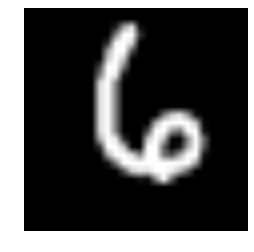

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import randint

indice = randint(0, len(test_labels - 1))

imagens = np.reshape(mnist.test.images, (len(test_labels), 28, 28))
plt.axis('off')
plt.imshow(imagens[indice], cmap='gray')

print('Exemplos para treino: %d' % len(train_labels))
print('Exemplos para teste: %d' % len(test_labels))

Com os nossos dados em mãos, vamos utilizar o TFLearn para definir a arquitetura da rede neural, que conterá 784 unidades na camada de entrada, representando os 28 * 28 pixels, 1 camada escondida de 25 unidades e 10 unidades na camada de saída, representando os dígitos de 0 a 9.

Por ter apenas uma camada escondida, essa é considerada uma rede rasa (e não profunda).

<img src="images/neural_net2.jpeg" style="width:519px;height:255px;">

A camada de entrada será setada automaticamente ao se invocar o método `fit()`.

In [4]:
rede = learn.DNNClassifier(hidden_units=[25], n_classes=10)
print('Rede neural criada.')

Rede neural criada.


Aqui, é necessário especificar quantas iterações o algoritmo de otimização deve rodar, já que o default é infinito :)
Para um bom treinamento deste modelo, sugerimos algo em torno de 1400 steps (pode demorar).

Antes de se treinar a rede neural, setamos o logger, que nos indicará o progresso do treinamento.

In [5]:
import logging
logging.getLogger().setLevel(logging.INFO)

#rede.fit(mnist.train.images, train_labels, steps=1400)
rede.fit(mnist.train.images, train_labels, steps=140)

logging.getLogger().setLevel(logging.WARN)

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32)
INFO:tensorflow:Training steps [0,140)
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:Step 1: loss_1:0 = 2.39871
INFO:tensorflow:training step 100, loss = 0.43431 (0.649 sec/batch).
INFO:tensorflow:Step 101: loss_1:0 = 0.432544
INFO:tensorflow:Step 140: loss_1:0 = 0.38318
INFO:tensorflow:training step 140, loss = 0.38318 (0.672 sec/batch).
INFO:tensorflow:Saving checkpoint for step 140 to checkpoint: /var/folders/2t/5kybgz8d1m73smnfb0rg4l2r0000gn/T/tmpuzwowbx6/model.ckpt.
INFO:tensorflow:Loss for final step: 0.38318.


Com o modelo treinado, vamos realizar algumas predições:

Predição: 6
Label: 6


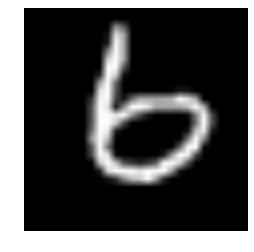

In [9]:
indice = randint(0, len(test_labels - 1))
plt.axis('off')
plt.imshow(imagens[indice], cmap='gray')

print('Predição: %d' % rede.predict(mnist.test.images[indice]))
print('Label: %d' % test_labels[indice])

Para calcular a acurácia das predições, utilizamos novamente a biblioteca <a href="http://scikit-learn.org/">scikit-learn</a>. Aqui, ela compara os valores das predições com os valores reais:

In [10]:
from sklearn import metrics

predicoes = rede.predict(mnist.test.images)
acuracia = metrics.accuracy_score(test_labels, predicoes)
print('Acurácia: {0:.2f}%'.format(acuracia * 100))

Acurácia: 90.23%
